In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
#always import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')
#seaborn has built in data sets to practice with

tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Scatter Charts

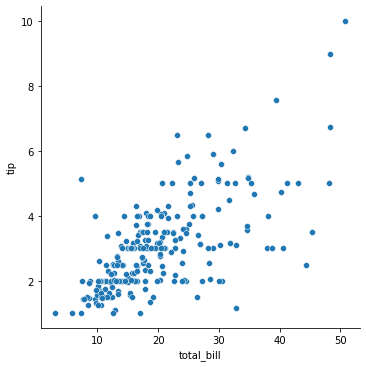

In [6]:
sns.relplot(x='total_bill', y='tip', data=tips)

# sns.relplot() creates a scatter chart out of a dataframe

# x= indicates the column used for the x axis

# y= indicates the column to be used for hte y axis

# data= indicates the pandas dataframe being used for the chart

Text(10.049999999999997, 0.5, 'Tip ($)')

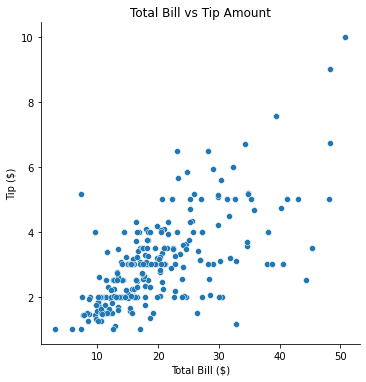

In [7]:
sns.relplot(x='total_bill', y='tip', data=tips)
plt.title('Total Bill vs Tip Amount')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

#once the chart has been created we can use matplotlib syntax to create titles and labels

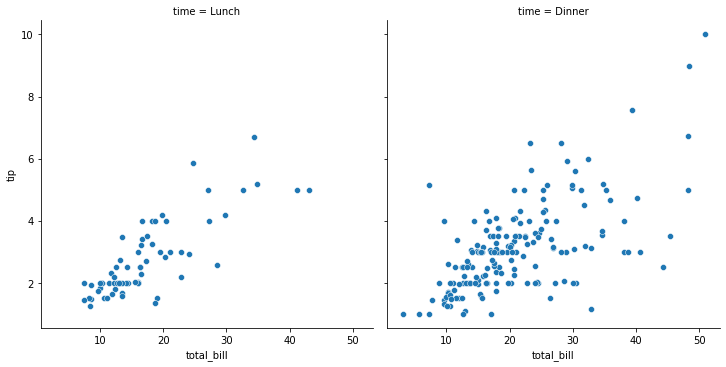

In [8]:
sns.relplot(x='total_bill', y='tip', col='time', data=tips)

# col= will create a seperate chart for each unique categorical value in the specified colum
## in this case the time column is divided between lunch and dinner time

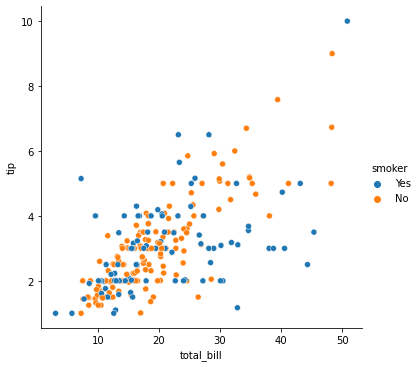

In [9]:
sns.relplot(x='total_bill', y='tip', hue='smoker', data=tips)

# hue= will make the data points different colors for each unique category in the specified column
## in this case whether or not the customer was a smoker

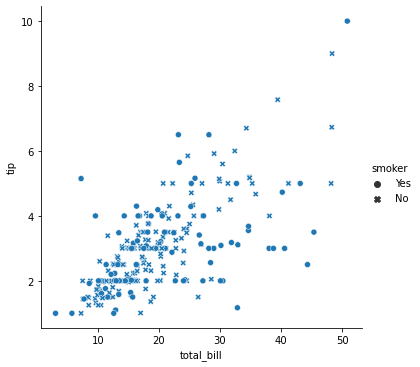

In [10]:
sns.relplot(x='total_bill', y='tip', style='smoker', data=tips)

# style= is similar to hue, but instead of different colors it works with different shapes 

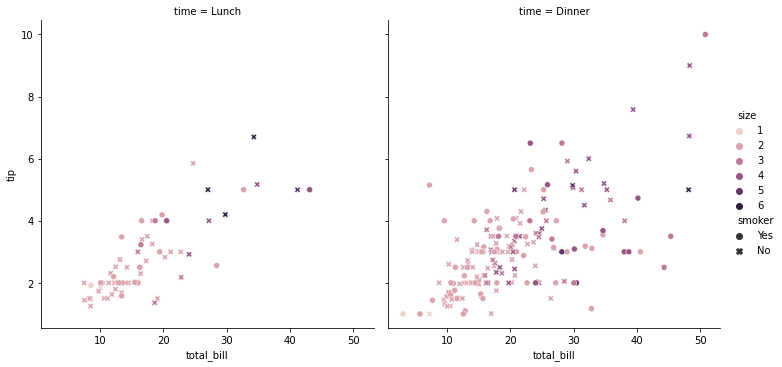

In [11]:
sns.relplot(x='total_bill', y='tip', col='time', hue='size', style='smoker', data=tips)

#all of these methods can be used simulataneously 

## sometimes less is more, too many descriptors can make the chart difficult to read 

# Other Chart Types

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

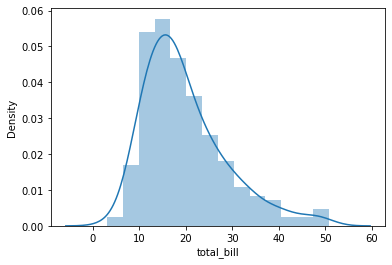

In [12]:
sns.distplot(tips.total_bill)

# sns.distplot() shows distribution of the specified dataframe and column

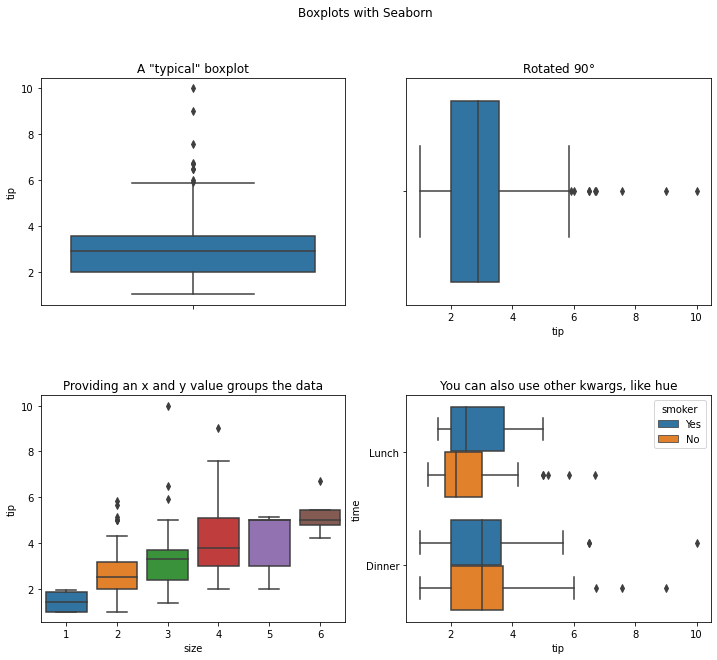

In [13]:
plt.figure(figsize=(12, 10))
plt.suptitle('Boxplots with Seaborn')

# you can use similar syntax from matplotlib to create a subplot in seaborn

plt.subplot(221)
sns.boxplot(data=tips, y='tip')
plt.title('A "typical" boxplot')

# sns.boxplot() will create a boxplot for the specified data set and column

plt.subplot(222)
sns.boxplot(data=tips, x='tip')
plt.title('Rotated 90$\degree$')

# switching to the x axis will rotate the plot

plt.subplot(223)
sns.boxplot(data=tips, y='tip', x='size')
plt.title('Providing an x and y value groups the data')

# adding an x and y axis will make a box for each uniqu value in the x axis comparing their dependent y values

plt.subplot(224)
sns.boxplot(data=tips, y='time', x='tip', hue='smoker')
plt.title('You can also use other kwargs, like hue')

# you can add hue to make even more comparisons on the same chart

plt.subplots_adjust(hspace=0.4)

size,1,2,3,4,5,6
time,,,,,,
Lunch,2,52,5,5,1,3
Dinner,2,104,33,32,4,1


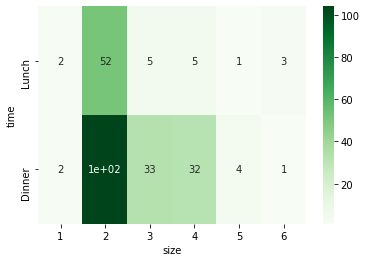

In [14]:
data = pd.crosstab(tips.time, tips['size'])
sns.heatmap(data, annot=True, cmap=plt.cm.Greens)
data

# sns.heatmap() will make a heatmap chart 

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'tip')

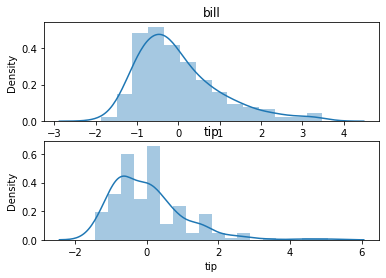

In [15]:
def scale(series):
    return (series - series.mean()) / series.std()

df = pd.DataFrame({'bill': scale(tips.total_bill),
                   'tip': scale(tips.tip)})

plt.subplot(211)
sns.distplot(df.bill)
plt.title('bill')

plt.subplot(212)
sns.distplot(df.tip)
plt.title('tip')

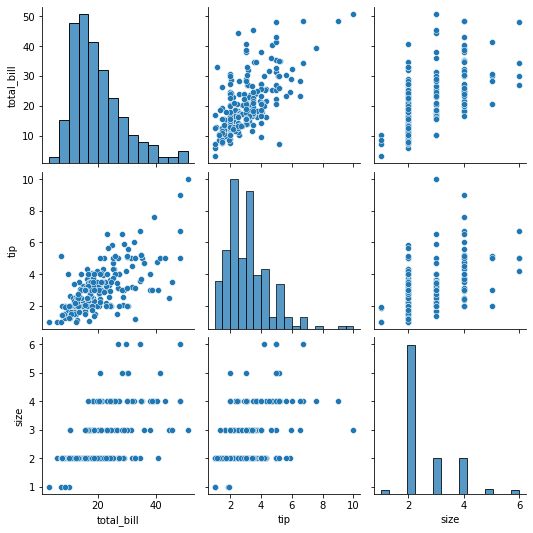

In [16]:
sns.pairplot(tips)

# sns.pairplot will show a sample of possible charts alignments

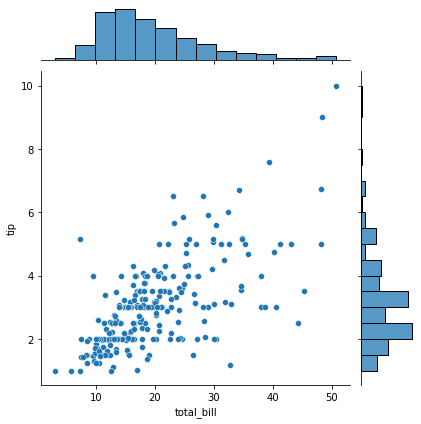

In [17]:
sns.jointplot(data=tips, x='total_bill', y='tip')

# sns.jointplot() will combine two different chart types together